<a href="https://www.arduino.cc/"><img src="https://raw.githubusercontent.com/sandeepmistry/aimldevfest-workshop-2019/master/images/Arduino_logo_R_highquality.png" width=200/></a>
# Tiny ML on Arduino
## Digit recognition with a magic wand
 * Benouahi Omaar
 * El Khaoui Safae
 * Ougaamou Mehdi


https://github.com/OuBnOu7/digit-magic-wand/branches

## Setup Python Environment

The next cell sets up the dependencies in required for the notebook, run it.

In [1]:
# Setup environment
!apt-get -qq install xxd
!pip install pandas numpy matplotlib
!pip install tensorflow==2.0.0-rc1

ERROR: Could not find a version that satisfies the requirement tensorflow==2.0.0-rc1 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1)
ERROR: No matching distribution found for tensorflow==2.0.0-rc1


# Upload Data

1. Open the panel on the left side of Colab by clicking on the __>__
1. Select the files tab
1. Drag `zero.csv` and `one.csv` files from your computer to the tab to upload them into colab.

# Graph Data (optional)

We'll graph the input files on two separate graphs, acceleration and gyroscope, as each data set has different units and scale.

<ipython-input-2-358c536b0960>:13: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-358c536b0960>:14: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-2-358c536b0960>:15: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')


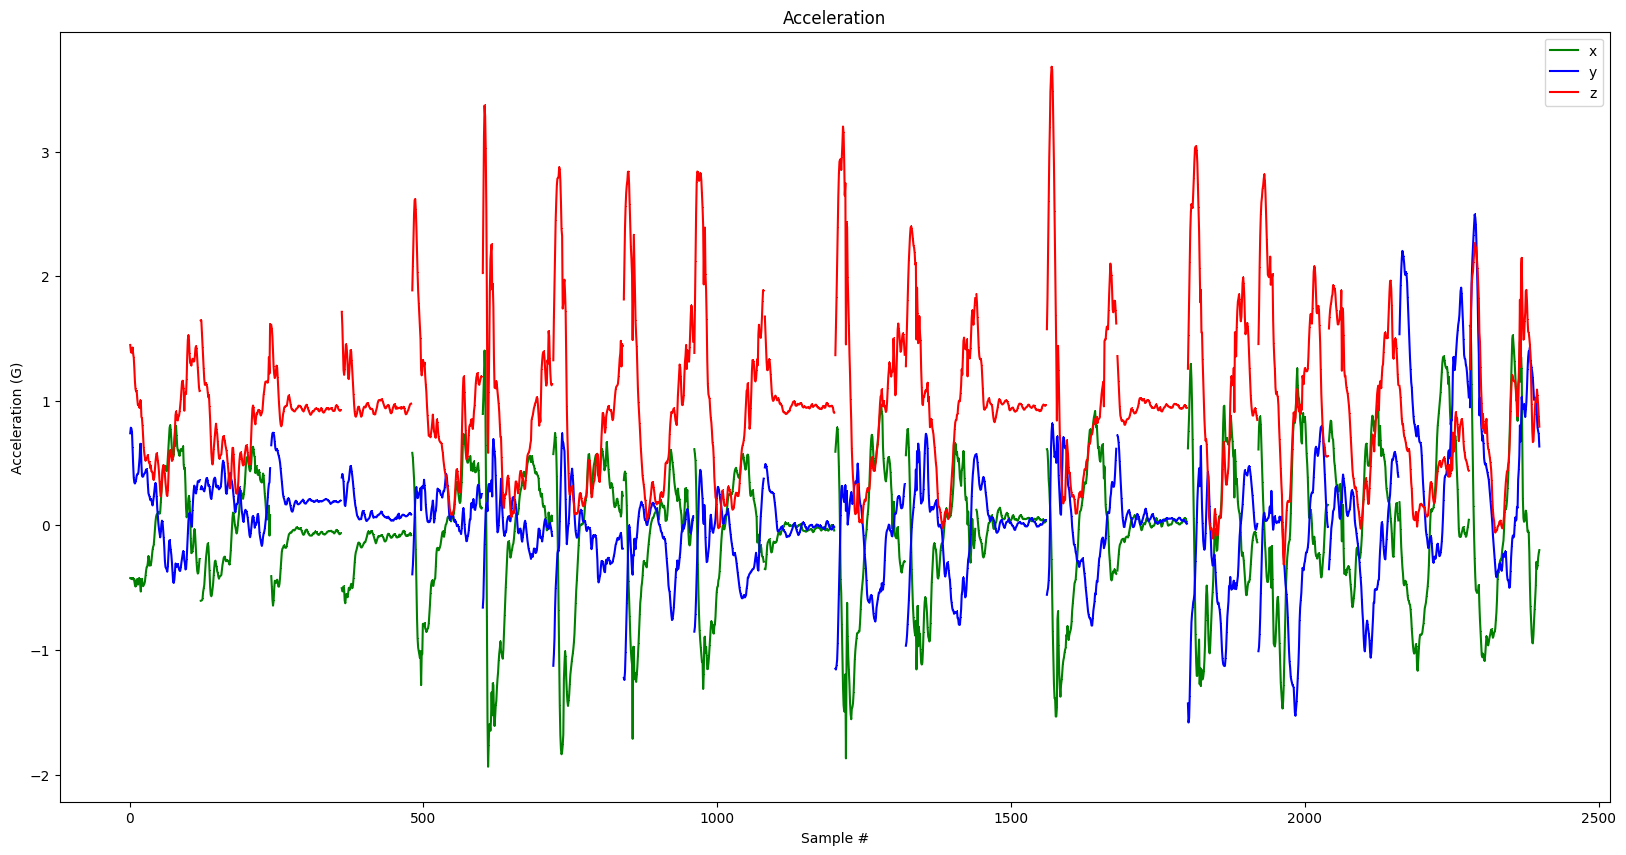

<ipython-input-2-358c536b0960>:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "g." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
<ipython-input-2-358c536b0960>:23: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "b." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
<ipython-input-2-358c536b0960>:24: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')


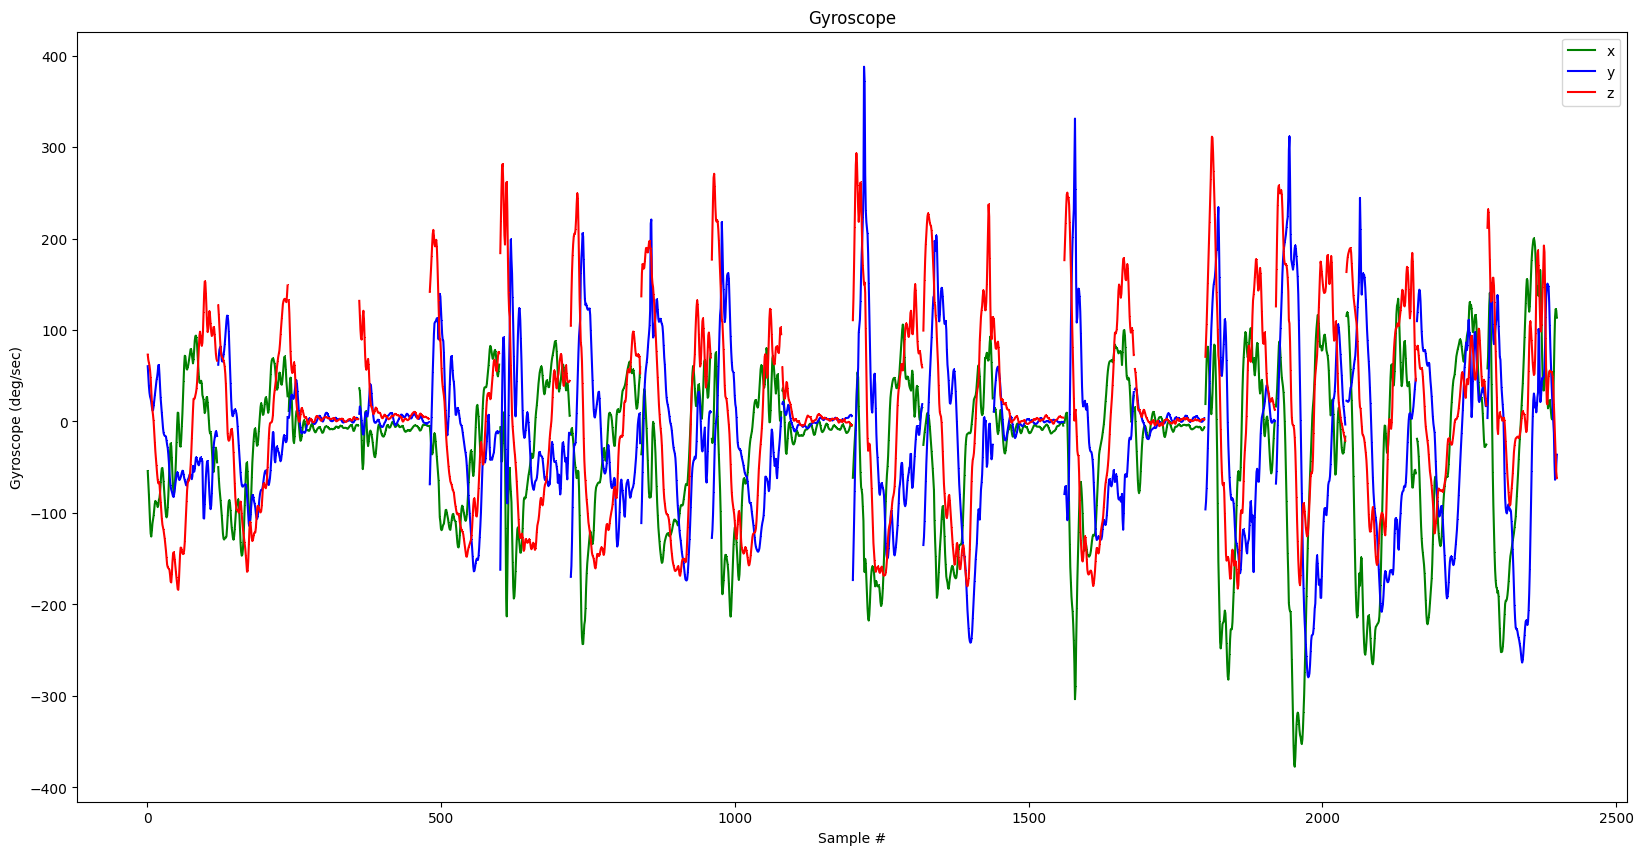

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

filename = "zero.csv"

df = pd.read_csv("/content/" + filename)

index = range(1, len(df['aX']) + 1)

plt.rcParams["figure.figsize"] = (20,10)

plt.plot(index, df['aX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['aY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['aZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Acceleration")
plt.xlabel("Sample #")
plt.ylabel("Acceleration (G)")
plt.legend()
plt.show()

plt.plot(index, df['gX'], 'g.', label='x', linestyle='solid', marker=',')
plt.plot(index, df['gY'], 'b.', label='y', linestyle='solid', marker=',')
plt.plot(index, df['gZ'], 'r.', label='z', linestyle='solid', marker=',')
plt.title("Gyroscope")
plt.xlabel("Sample #")
plt.ylabel("Gyroscope (deg/sec)")
plt.legend()
plt.show()


# Train Neural Network





## Parse and prepare the data

The next cell parses the csv files and transforms them to a format that will be used to train the fully connected neural network.

Update the `digit` list with the gesture data you've collected in `.csv` format.


In [65]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

print(f"TensorFlow version = {tf.__version__}\n")

# Set a fixed random seed value, for reproducibility, this will allow us to get
# the same random numbers each time the notebook is run
SEED = 1337
np.random.seed(SEED)
tf.random.set_seed(SEED)

# the list of gestures that data is available for
GESTURES = [
    "zero",
    "one",
]

SAMPLES_PER_GESTURE = 90

NUM_GESTURES = len(GESTURES)

# create a one-hot encoded matrix that is used in the output
ONE_HOT_ENCODED_GESTURES = np.eye(NUM_GESTURES)

inputs = []
outputs = []

# read each csv file and push an input and output
for gesture_index in range(NUM_GESTURES):
  gesture = GESTURES[gesture_index]
  print(f"Processing index {gesture_index} for gesture '{gesture}'.")

  output = ONE_HOT_ENCODED_GESTURES[gesture_index]

  df = pd.read_csv("/content/" + gesture + ".csv")

  # calculate the number of gesture recordings in the file
  num_recordings = int(df.shape[0] / SAMPLES_PER_GESTURE)

  print(f"\tThere are {num_recordings} recordings of the {gesture} gesture.")

  for i in range(num_recordings):
    tensor = []
    for j in range(SAMPLES_PER_GESTURE):
      index = i * SAMPLES_PER_GESTURE + j
      # normalize the input data, between 0 to 1:
      # - acceleration is between: -4 to +4
      # - gyroscope is between: -2000 to +2000
      tensor += [
          (df['aX'][index] + 4) / 8,
          (df['aY'][index] + 4) / 8,
          (df['aZ'][index] + 4) / 8,
          (df['gX'][index] + 2000) / 4000,
          (df['gY'][index] + 2000) / 4000,
          (df['gZ'][index] + 2000) / 4000
      ]

    inputs.append(tensor)
    outputs.append(output)

# convert the list to numpy array
inputs = np.array(inputs)
outputs = np.array(outputs)

print("Data set parsing and preparation complete.")

TensorFlow version = 2.15.0

Processing index 0 for gesture 'zero'.
	There are 26 recordings of the zero gesture.
Processing index 1 for gesture 'one'.
	There are 26 recordings of the one gesture.
Data set parsing and preparation complete.


## Randomize and split the input and output pairs for training

Randomly split input and output pairs into sets of data: 60% for training, 20% for validation, and 20% for testing.

  - the training set is used to train the model
  - the validation set is used to measure how well the model is performing during training
  - the testing set is used to test the model after training

In [57]:
inputs = pd.DataFrame(inputs)
outputs = pd.DataFrame(outputs)
inputs

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.447125,0.592375,0.681000,0.486465,0.515106,0.518280,0.447000,0.598000,0.675125,0.483429,...,0.560000,0.489380,0.484115,0.458801,0.513250,0.495875,0.552875,0.494141,0.485428,0.457184
1,0.511625,0.492125,0.543625,0.499039,0.486099,0.455628,0.513375,0.488000,0.534000,0.502411,...,0.686000,0.502792,0.481430,0.538147,0.527000,0.503875,0.690875,0.504730,0.484894,0.534973
2,0.529625,0.511500,0.685875,0.506561,0.487442,0.530533,0.523375,0.512625,0.671500,0.506668,...,0.591875,0.470398,0.503265,0.482818,0.452250,0.539125,0.584125,0.472870,0.503281,0.479492
3,0.448500,0.537375,0.574500,0.475159,0.502823,0.477432,0.446500,0.536125,0.568000,0.476700,...,0.580375,0.503067,0.485046,0.483063,0.568375,0.510875,0.578250,0.504624,0.486023,0.482529
4,0.568125,0.507375,0.572625,0.506073,0.486526,0.481949,0.564375,0.501875,0.566375,0.506622,...,0.655500,0.494736,0.506180,0.514984,0.443250,0.576125,0.660250,0.494095,0.506653,0.516174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,0.481875,0.482875,0.482625,0.509415,0.475739,0.465500,0.491000,0.483125,0.492250,0.510956,...,0.571750,0.501053,0.493134,0.498962,0.545625,0.477375,0.573000,0.501709,0.491135,0.499420
90,0.544750,0.474625,0.574625,0.501877,0.491089,0.500366,0.542375,0.472625,0.577625,0.501343,...,0.460000,0.483276,0.508530,0.499573,0.482875,0.521375,0.456250,0.484253,0.511459,0.499618
91,0.479125,0.525750,0.452250,0.485809,0.513138,0.499267,0.477750,0.529125,0.445625,0.487671,...,0.729750,0.499832,0.490951,0.506058,0.553000,0.497750,0.724125,0.503616,0.495224,0.507477
92,0.538875,0.493250,0.729000,0.506973,0.498322,0.508606,0.529500,0.484375,0.749875,0.511108,...,0.572750,0.445618,0.519272,0.499390,0.544250,0.477875,0.536625,0.447784,0.517288,0.498337


In [62]:
from sklearn.model_selection import train_test_split

# Remove rows with missing values (NaNs)
inputs = inputs.dropna()
outputs = outputs.loc[inputs.index]  # Keep corresponding rows in outputs

# Shuffle the data
inputs = inputs.sample(frac=1).reset_index(drop=True)
outputs = outputs.sample(frac=1).reset_index(drop=True)

# Split the data into training and temporary sets (80% train + validate, 20% test)
inputs_train_validate, inputs_test, outputs_train_validate, outputs_test = train_test_split(
    inputs, outputs, test_size=0.2, random_state=42)

# Further split the temporary set into training and validation sets (60% train, 20% validate)
inputs_train, inputs_validate, outputs_train, outputs_validate = train_test_split(
    inputs_train_validate, outputs_train_validate, test_size=0.25, random_state=42)

print("Data set randomization and splitting complete.")


Data set randomization and splitting complete.


In [63]:
inputs_train

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2,0.447500,0.605500,0.714875,0.491806,0.487824,0.493957,0.437625,0.608375,0.733125,0.490738,...,0.492375,0.501236,0.496582,0.486328,0.547875,0.472875,0.489250,0.502716,0.496857,0.488205
23,0.506625,0.500875,0.617750,0.496841,0.500412,0.499557,0.508625,0.499750,0.617875,0.496811,...,0.614500,0.498749,0.500076,0.500641,0.505375,0.501125,0.615375,0.498764,0.499878,0.500870
11,0.559500,0.528125,0.737500,0.499512,0.511871,0.539535,0.551375,0.537375,0.731500,0.492523,...,0.520000,0.455063,0.450058,0.473251,0.531375,0.388750,0.525750,0.461777,0.448288,0.474365
48,0.394125,0.520375,0.543000,0.463486,0.500824,0.458496,0.396750,0.515250,0.536375,0.463226,...,0.606375,0.520126,0.485550,0.524414,0.571125,0.466750,0.607375,0.520019,0.484863,0.525070
16,0.508875,0.500875,0.522000,0.472519,0.483719,0.459473,0.516125,0.499875,0.523875,0.472153,...,0.675750,0.516815,0.498352,0.516601,0.518375,0.515000,0.674000,0.516678,0.491684,0.511429
28,0.511625,0.492125,0.543625,0.499039,0.486099,0.455628,0.513375,0.488000,0.534000,0.502411,...,0.686000,0.502792,0.481430,0.538147,0.527000,0.503875,0.690875,0.504730,0.484894,0.534973
31,0.479125,0.501875,0.396875,0.493591,0.494919,0.487122,0.480125,0.501875,0.399625,0.496567,...,0.838375,0.494781,0.513550,0.505951,0.476250,0.427625,0.815000,0.492447,0.519333,0.505356
46,0.397750,0.543875,0.519000,0.465942,0.475693,0.481094,0.401500,0.533750,0.518375,0.466553,...,0.568000,0.527298,0.527771,0.511749,0.564625,0.605250,0.554875,0.531494,0.524460,0.515015
53,0.484125,0.503125,0.627000,0.493866,0.497452,0.500183,0.487000,0.496875,0.625375,0.494415,...,0.619125,0.497086,0.500656,0.500931,0.493875,0.498250,0.618750,0.497223,0.500519,0.500748
35,0.475375,0.423625,0.489750,0.461853,0.471527,0.460877,0.486750,0.421250,0.492500,0.466476,...,0.691750,0.505981,0.502594,0.521576,0.430125,0.552250,0.695625,0.500473,0.503479,0.521210


## Build & Train the Model

Build and train a [TensorFlow](https://www.tensorflow.org) model using the high-level [Keras](https://www.tensorflow.org/guide/keras) API.

In [ ]:
# build the model and train it
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, activation='relu')) # relu is used for performance
model.add(tf.keras.layers.Dense(15, activation='relu'))
model.add(tf.keras.layers.Dense(NUM_GESTURES, activation='softmax')) # softmax is used, because we only expect one gesture to occur per input
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
history = model.fit(inputs_train, outputs_train, epochs=600, batch_size=1, validation_data=(inputs_validate, outputs_validate))



## Verify

Graph the models performance vs validation.


### Graph the loss

Graph the loss to see when the model stops improving.

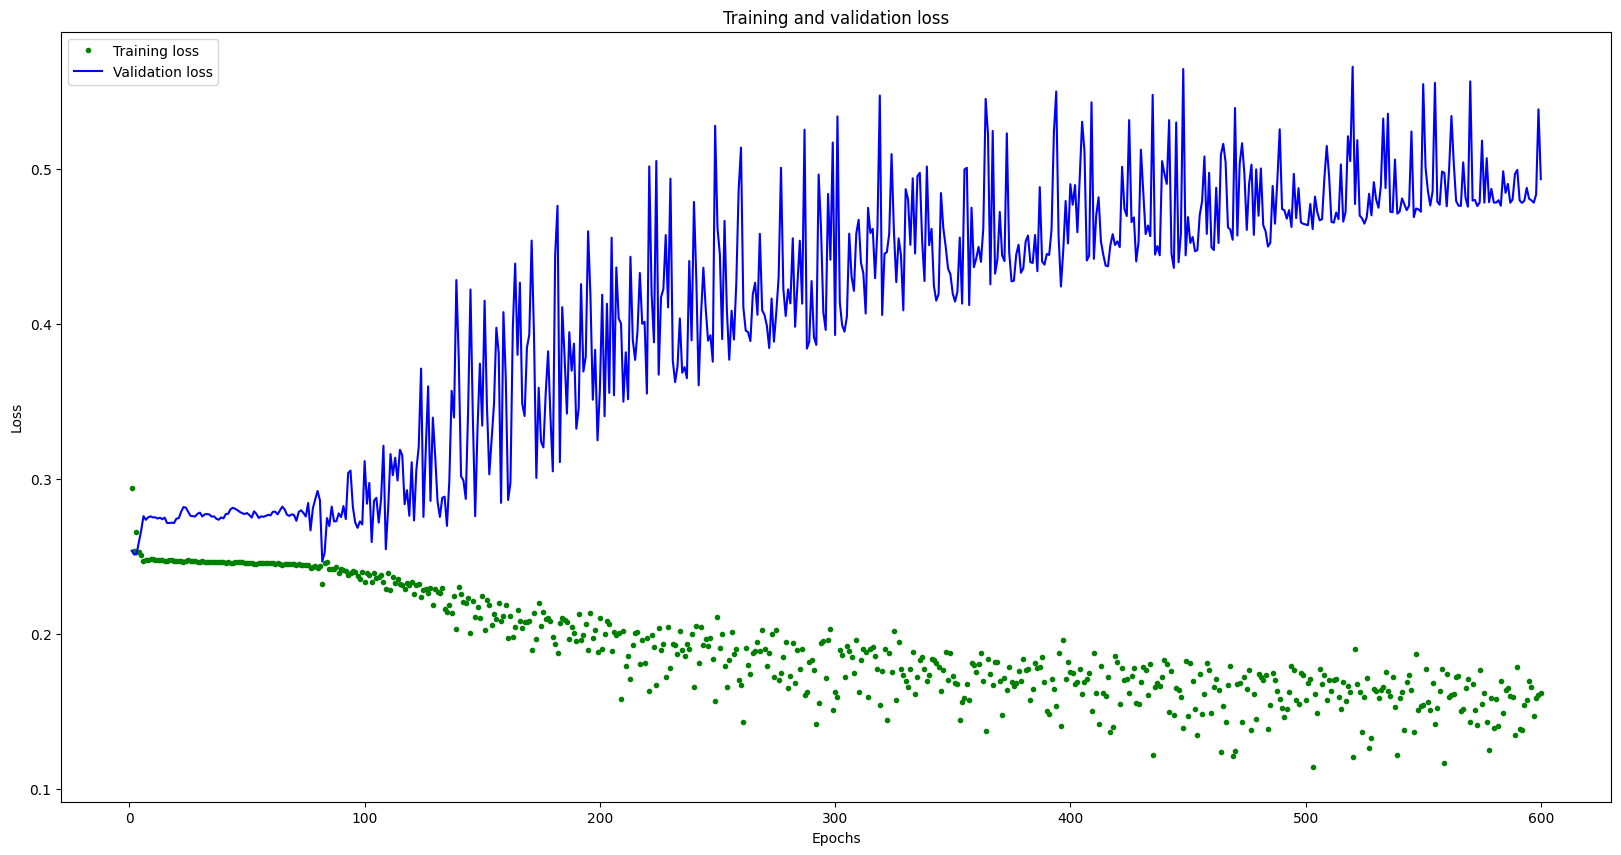

[20.0, 10.0]


In [66]:
# increase the size of the graphs. The default size is (6,4).
plt.rcParams["figure.figsize"] = (20,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

print(plt.rcParams["figure.figsize"])

### Graph the loss again, skipping a bit of the start

We'll graph the same data as the previous code cell, but start at index 100 so we can further zoom in once the model starts to converge.

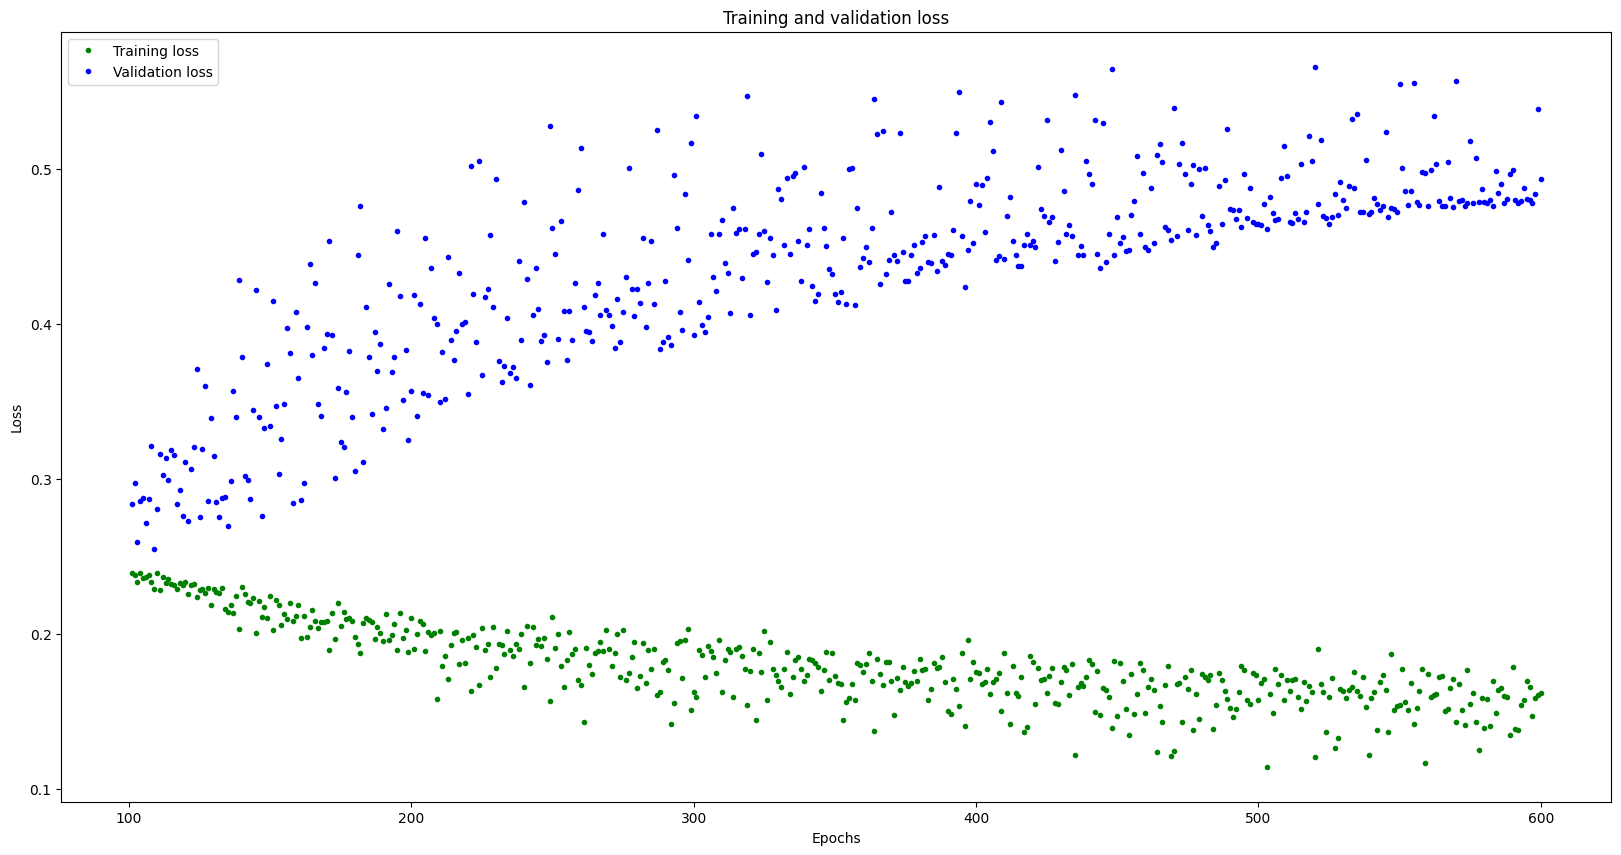

In [67]:
# graph the loss again skipping a bit of the start
SKIP = 100
plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Graph the mean absolute error

[Mean absolute error](https://en.wikipedia.org/wiki/Mean_absolute_error) is another metric to judge the performance of the model.



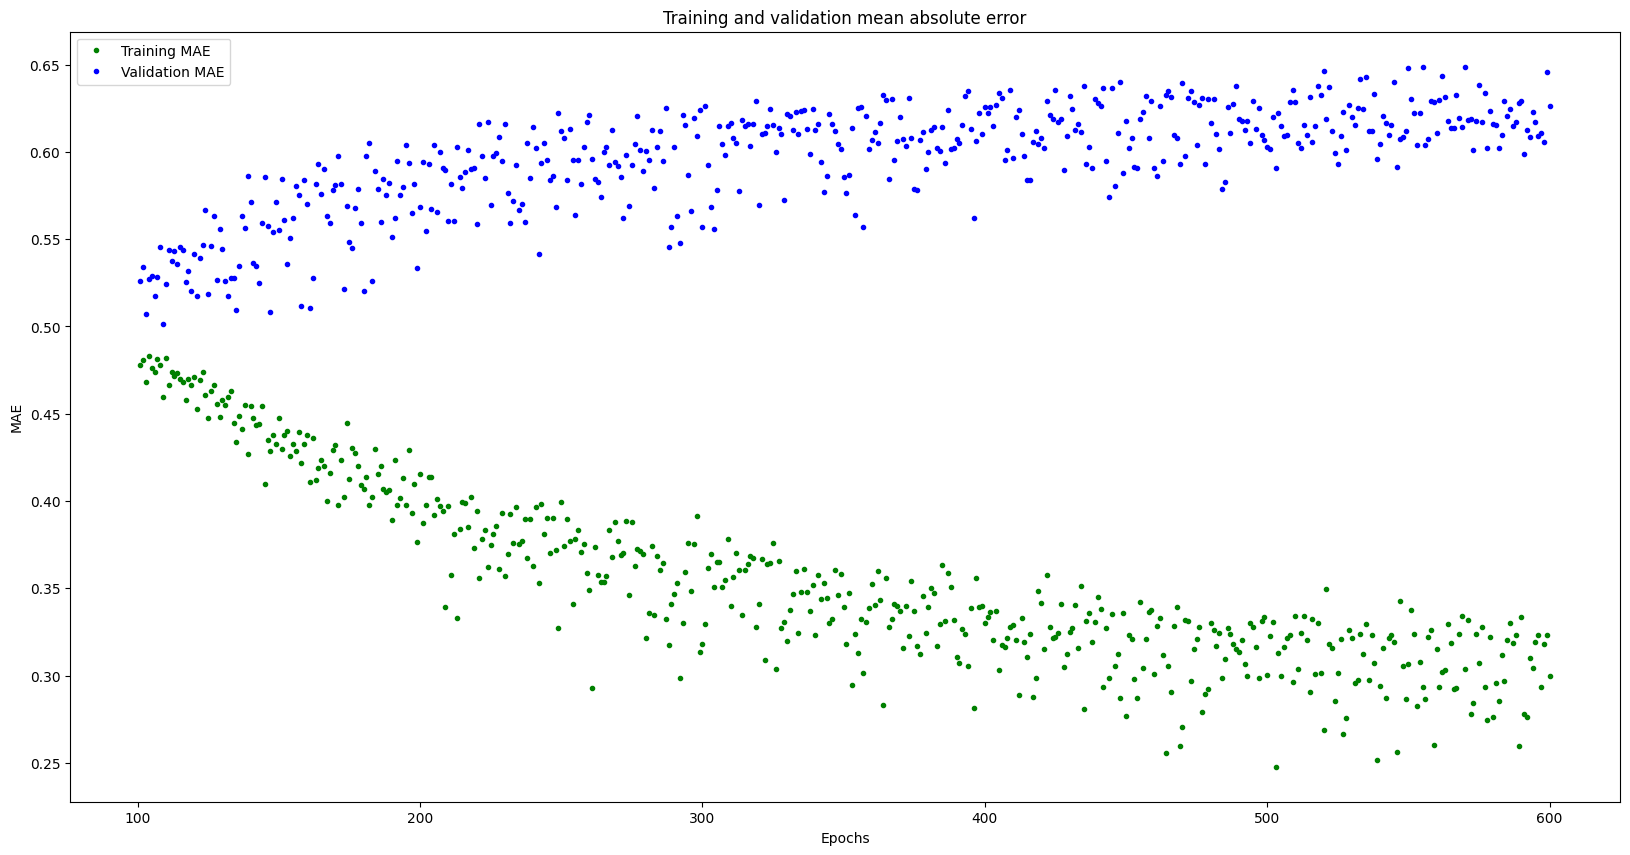

In [68]:
# graph of mean absolute error
mae = history.history['mae']
val_mae = history.history['val_mae']
plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()


### Run with Test Data
Put our test data into the model and plot the predictions


1/1 [==============================] - 0s 141ms/step
predictions =
 [[0.624 0.376]
 [0.263 0.737]
 [0.24  0.76 ]
 [0.671 0.329]
 [0.412 0.588]
 [0.931 0.069]
 [0.012 0.988]
 [0.937 0.063]
 [0.247 0.753]
 [0.862 0.138]
 [0.652 0.348]
 [0.289 0.711]]
actual =
       0    1
0   0.0  1.0
5   0.0  1.0
33  1.0  0.0
13  0.0  1.0
19  1.0  0.0
50  1.0  0.0
36  1.0  0.0
26  1.0  0.0
44  0.0  1.0
12  1.0  0.0
54  1.0  0.0
3   0.0  1.0


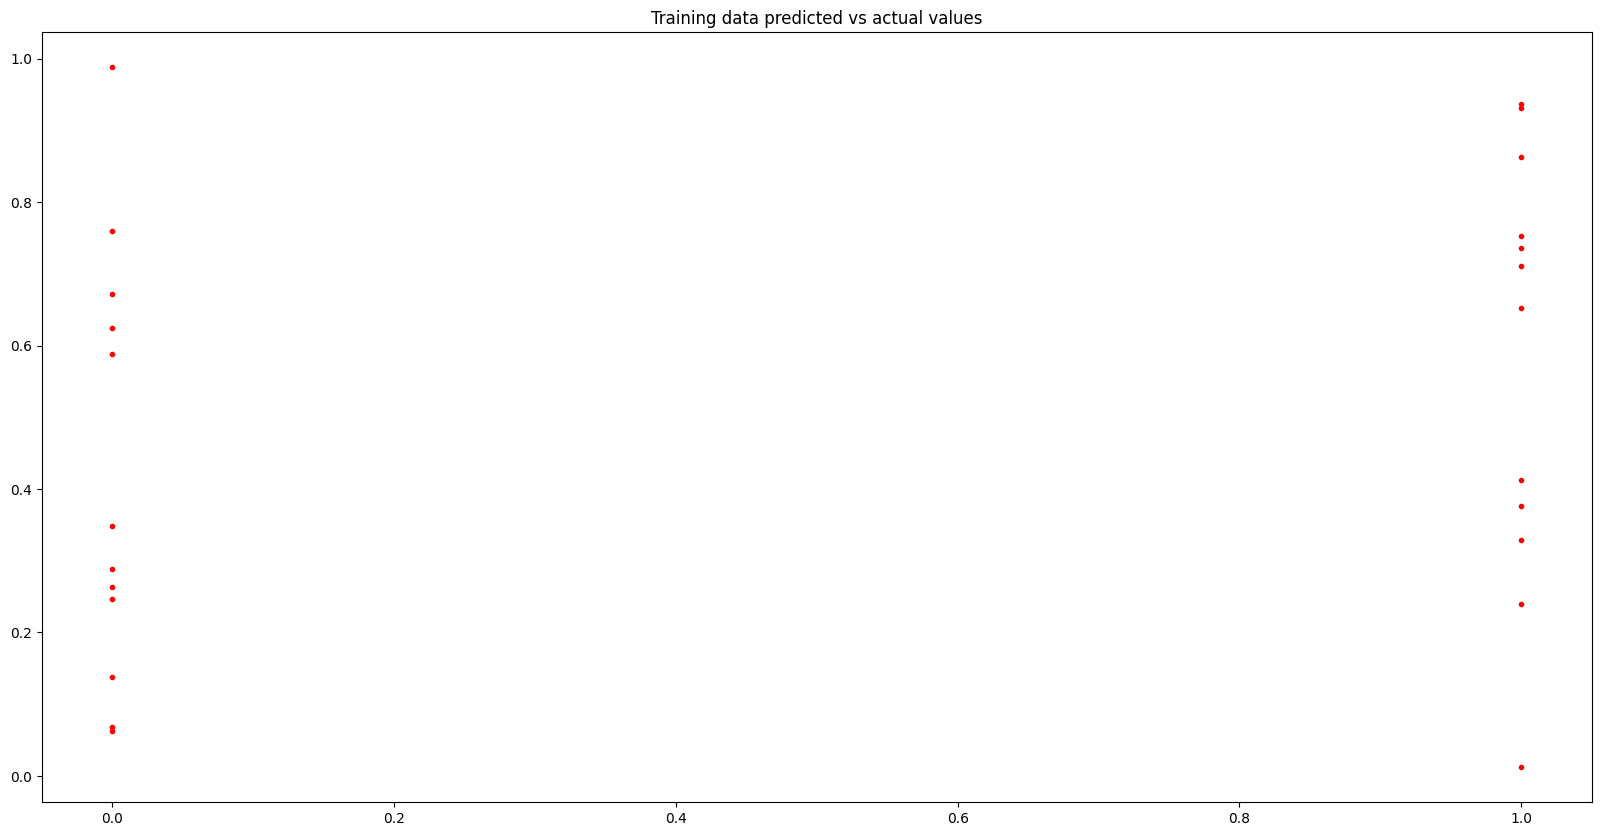

In [76]:
# use the model to predict the test inputs
predictions = model.predict(inputs_test)

# print the predictions and the expected ouputs
print("predictions =\n", np.round(predictions, decimals=3))
print("actual =\n", outputs_test)

# Plot the predictions along with to the test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(outputs_test,predictions, 'r.', label='Actual')
#plt.plot(inputs_test, predictions, 'r.', label='Predicted')
plt.show()

# Convert the Trained Model to Tensor Flow Lite

The next cell converts the model to TFlite format. The size in bytes of the model is also printed out.

In [70]:
# Convert the model to the TensorFlow Lite format without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)

import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)



Model is 65736 bytes


## Encode the Model in an Arduino Header File

The next cell creates a constant byte array that contains the TFlite model. Import it as a tab with the sketch below.

In [71]:
!echo "const unsigned char model[] = {" > /content/model.h
!cat gesture_model.tflite | xxd -i      >> /content/model.h
!echo "};"                              >> /content/model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model.h, is 405,406 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.


# Classifying IMU Data

Now it's time to switch back to the tutorial instructions and run our new model on the Arduino Nano 33 BLE Sense to classify the accelerometer and gyroscope data.
